# **Feature Engineering**

In [1]:
import logging
import pandas as pd
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data module
try:
    from data_loader import load_data
    logger_initialized = True
except ImportError as e:
    logger_initialized = False
    print(f"Error importing 'load_data': {e}")

# Set pandas display options for better visibility
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Configure logging
def setup_logger(name: str = 'my_logger') -> logging.Logger:
    """
    Set up a logger with INFO level and StreamHandler.
    
    Parameters:
    -----------
    name : str
        The name of the logger.
    
    Returns:
    --------
    logging.Logger
        Configured logger instance.
    """
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)
    
    # Prevent duplicate handlers
    if not logger.hasHandlers():
        handler = logging.StreamHandler()
        handler.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
    
    return logger

# Initialize logger
logger = setup_logger()
logger.info("Imported necessary libraries.")

# Check and log if 'load_data' was successfully imported
if logger_initialized:
    logger.info("'load_data' module imported successfully.")
else:
    logger.warning("'load_data' module could not be imported. Check the 'scripts' directory and file availability.")

2025-01-24 18:43:00,736 - INFO - Imported necessary libraries.
2025-01-24 18:43:00,737 - INFO - 'load_data' module imported successfully.


In [3]:
logger.info("🟢 Starting the data loading process...")
df = load_data('../data/data.csv')
if not df.empty:
    logger.info(f"✅ Data loaded successfully! The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
else:
    logger.warning("⚠️ Data loading completed, but the dataset is empty.")

2025-01-24 18:43:00,747 - INFO - 🟢 Starting the data loading process...
2025-01-24 18:43:01,013 - INFO - ✅ Data loaded successfully! The dataset contains 95662 rows and 15 columns.


Data successfully loaded from '../data/data.csv' with 95662 rows and 15 columns.


In [4]:
# Import the python class for feature engineering
from feature_engineering import FeatureEngineering

# Instantiate the FeatureEngineering class
feature_engineer = FeatureEngineering()

In [5]:
# Identify columns to exclude and categorical columns to encode
cols_to_drop = ['ProductId', 'BatchId', 'AccountId', 'ProviderId', 'SubscriptionId', 'Value', 'CountryCode', 'CurrencyCode']
cat_features = ['ProductCategory', 'ChannelId']

# Drop unnecessary columns
df.drop(columns=cols_to_drop, inplace=True)

In [6]:
if __name__ == '__main__':
    print("🟢 Starting feature engineering process...")
    print("===============================================")

    # Create aggregate features
    df_copy = df.copy().reset_index()
    agg_features = feature_engineer.create_aggregate_features(df_copy)
    print("Aggregate features created.")
    print("===============================================")
    # Extract time features
    df_with_time_features = feature_engineer.extract_time_features(agg_features)
    print("Time features extracted.")
    print("===============================================")
    # Encode categorical features
    df_encoded = feature_engineer.encode_categorical_features(df_with_time_features, cat_features)
    print("Categorical features encoded.")
    print("===============================================")
    # Handle missing values
    df_cleaned = feature_engineer.handle_missing_values(df_encoded)
    print("Missing values handled.")
    print("===============================================")
    # Normalize numerical features
    numeric_cols = df_encoded.select_dtypes(include='number').columns
    exclude_cols = ['Amount', 'FraudResult']  # Replace with actual column names to exclude
    numeric_cols = numeric_cols.difference(exclude_cols)

    df_normalized = feature_engineer.normalize_numerical_features(df_encoded, numeric_cols, method='standardize')
    print("✅ Numerical features normalized.")
    print("===============================================")


🟢 Starting feature engineering process...
Aggregate features created.
Time features extracted.
Categorical features encoded.
Missing values handled.
✅ Numerical features normalized.


In [7]:
# Display the results
df_normalized

,CustomerId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,CustomerId_4406,-0.799047,0.746738,1000.0,2018-11-15 02:18:49+00:00,-0.349252,0.0,0.170118,-0.067623,-0.311831,-0.168551,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_73770,CustomerId_4406,0.491064,-1.175144,-20.0,2018-11-15 02:19:08+00:00,-0.349252,0.0,0.170118,-0.067623,-0.311831,-0.168551,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_26203,CustomerId_4683,-0.799047,0.746738,500.0,2018-11-15 02:44:21+00:00,-0.349252,0.0,0.165122,-0.072568,-0.444993,-0.202748,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_380,CustomerId_988,4.361398,0.746738,20000.0,2018-11-15 03:32:55+00:00,-0.349252,0.0,0.175567,-0.008155,-0.404020,-0.009754,-1.949214,-0.100739,0.848684,-0.994246
TransactionId_28195,CustomerId_988,0.491064,-1.175144,-644.0,2018-11-15 03:34:21+00:00,-0.349252,0.0,0.175567,-0.008155,-0.404020,-0.009754,-1.949214,-0.100739,0.848684,-0.994246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TransactionId_89881,CustomerId_3078,0.491064,-1.175144,-1000.0,2019-02-13 09:54:09+00:00,-0.349252,0.0,0.276904,-0.028743,0.204885,0.050775,-0.711319,-0.323884,-0.874040,1.005787
TransactionId_91597,CustomerId_3874,-0.799047,0.746738,1000.0,2019-02-13 09:54:25+00:00,-0.349252,0.0,0.167759,-0.062526,-0.398330,-0.177178,-0.711319,-0.323884,-0.874040,1.005787
TransactionId_82501,CustomerId_3874,0.491064,-1.175144,-20.0,2019-02-13 09:54:35+00:00,-0.349252,0.0,0.167759,-0.062526,-0.398330,-0.177178,-0.711319,-0.323884,-0.874040,1.005787


In [8]:
# Display normalized Columns
df_normalized.columns

Index(['CustomerId', 'ProductCategory', 'ChannelId', 'Amount',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year'],
      dtype='object')

In [9]:
# Save extracted and cleaned features to CSV
df_normalized.to_csv('../data/extracted_features.csv', index=False)
print("✅ Extracted features saved to '../data/extracted_features.csv'.")

✅ Extracted features saved to '../data/extracted_features.csv'.


### **Feature Engineering Process**

The feature engineering process involves several key steps to prepare the dataset for analysis and model training:

#### **Steps Involved**

1. **Encoding Categorical Variables**:
   - Categorical variables were encoded using one-hot encoding to convert them into a numerical format suitable for machine learning algorithms.

2. **Standardizing Numerical Features**:
   - Numerical features were standardized using the `StandardScaler`. This ensures consistency in scale across features, which is crucial for many machine learning models.

3. **Handling Missing Values**:
   - During the feature engineering process, the new feature `Std_Transaction_Amount` was found to have **712 missing values**. To ensure data completeness, these missing values were imputed with the mean of the feature.

#### **Summary**

These steps improve the quality of the dataset, making it more suitable for further analysis and predictive modeling. Proper encoding, scaling, and handling of missing values are essential for building effective machine learning models.

# **Default estimator and WoE binning**

### **RFM Model**

The RFM model is a classic customer stratification technique that segments customer groups based on three key dimensions:

- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much money a customer spends.

### **Steps to Implement**

1. **Data Preparation**:
   - Ensure the transaction data includes key columns: `TransactionId`, `CustomerId`, `TransactionStartTime`, and `Amount`.

2. **Calculate Last Access Date**:
   - Determine the most recent transaction date for each customer.

3. **Calculate RFM Scores**:
   - Compute the RFM metrics based on the defined formulas for Recency, Frequency, and Monetary values.

In [10]:
# Import the CreditScoreRFM class from the credit scoring model
from credit_scoring_model import CreditScoreRFM

# Initialize RFMS object with normalized DataFrame
rfm = CreditScoreRFM(df_normalized.reset_index())
print("✅ RFM model initialized successfully with the normalized data.")

✅ RFM model initialized successfully with the normalized data.


#### **Calculate Recency, Frequency, and Monetary**

In [11]:
# Calculate Recency, Frequency, and Monetary metrics using the RFM model
rfm_df = rfm.calculate_rfm()

# Display the first five rows of the RFM DataFrame
print("Calculated RFM metrics for the first five customers:")
print("=========================================================")
rfm_df[['CustomerId', 'Recency', 'Frequency', 'Monetary']].head()

Calculated RFM metrics for the first five customers:


,CustomerId,Recency,Frequency,Monetary
0,CustomerId_4406,2173,119,109921.75
2,CustomerId_4683,2253,2,1000.00
3,CustomerId_988,2177,38,228727.20
5,CustomerId_1432,2262,1,2000.00
6,CustomerId_2858,2177,29,93400.00


#### **Visualize the RFM variables**

🟢 Starting RFM visualizations...
Generating pairplot...


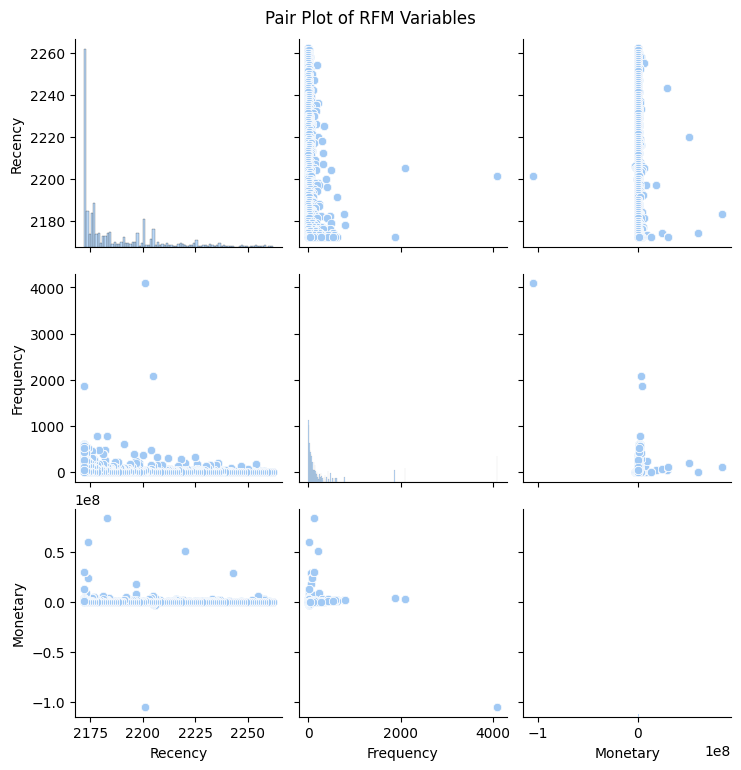

✅ Pairplot generated successfully.

Generating heatmap...


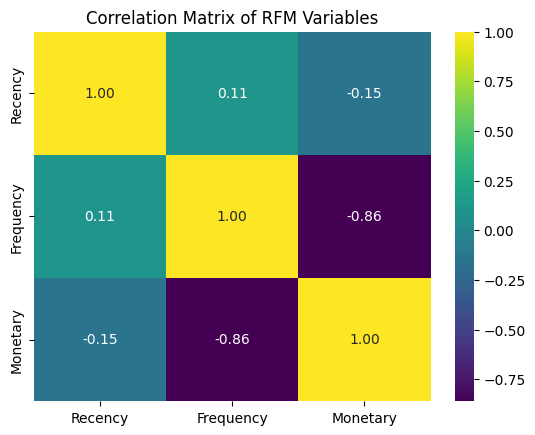

✅ Heatmap generated successfully.

Generating histograms...


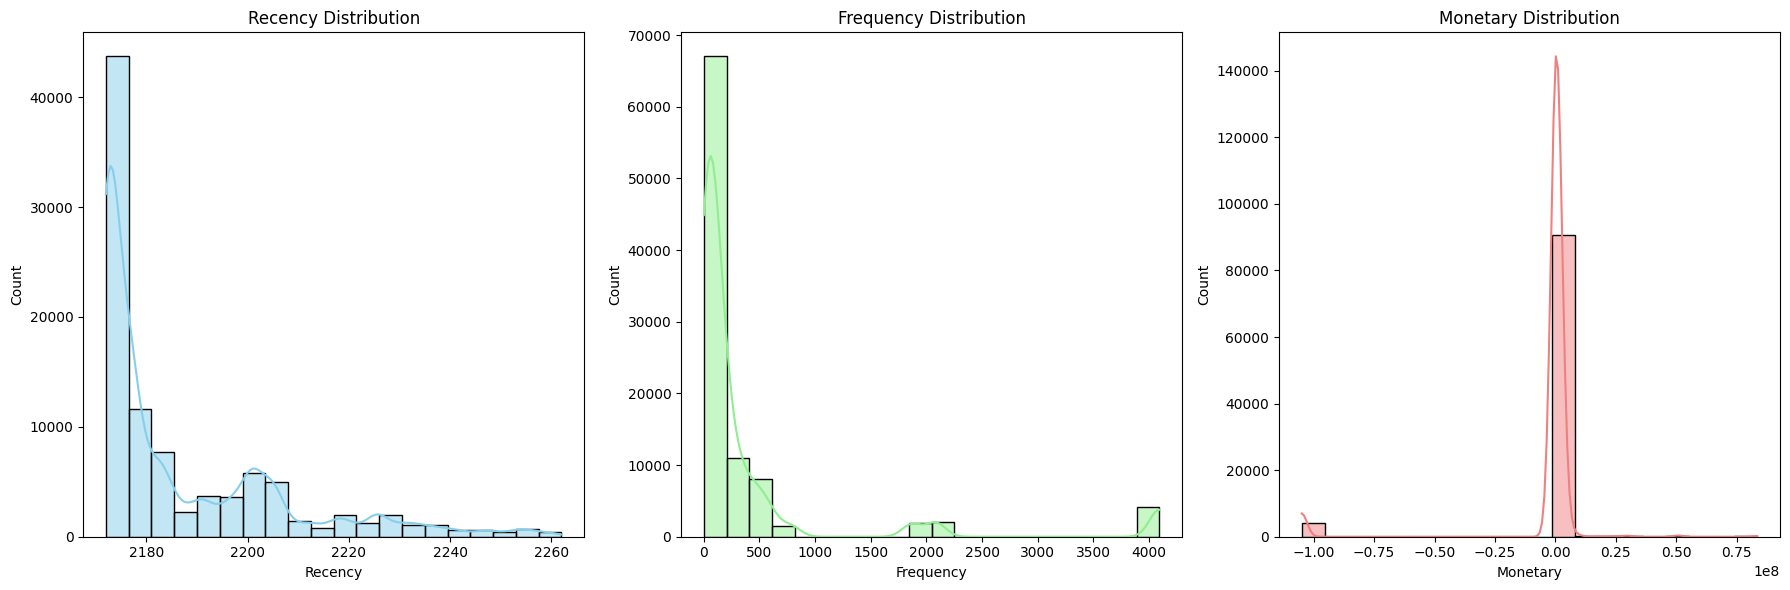

✅ Histograms generated successfully.

✅ All visualizations completed. ✅


In [12]:
# Define a function to call and organize RFMS visualizations
def visualize_rfm_data(rfm):
    """
    Function to visualize RFM data comprehensively.

    Parameters:
    - rfm (CreditScoreRFM): The CreditScoreRFM object containing RFM data and visualization methods.

    Visualizations:
    1. Pairplot: Displays relationships between 'Recency', 'Frequency', 'Monetary', and 'Risk_Level'.
    2. Heatmap: Provides a correlation matrix for the dataset.
    3. Histograms: Shows the distribution of RFM metrics.
    """
    print("🟢 Starting RFM visualizations...")
    print("===========================================")
    try:
        print("Generating pairplot...")
        rfm.plot_pairplot()  # Plot relationships between R, F, M, and risk level
        print("✅ Pairplot generated successfully.\n")
        print("===========================================")

        print("Generating heatmap...")
        rfm.plot_heatmap()  # Plot heatmap for correlations
        print("✅ Heatmap generated successfully.\n")
        print("===========================================")

        print("Generating histograms...")
        rfm.plot_histograms()  # Plot distributions of metrics
        print("✅ Histograms generated successfully.\n")
        print("===========================================")

        print("✅ All visualizations completed. ✅")
        print("===========================================")
    except AttributeError as e:
        print(
            f"AttributeError: {e}. Ensure that 'Recency', 'Frequency', 'Monetary', and 'Risk_Level' are defined in rfms_df."
        )
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Call the function to visualize the data
visualize_rfm_data(rfm)


### **Calculate RFM score and assign bad or good labels**

In [13]:
# Calculate RFM scores
rfm_df_scores = rfm.calculate_rfm_scores(rfm_df)

# Assign labels
rfm_df_scores = rfm.assign_label(rfm_df_scores)

# Display the updated RFM DataFrame with required columns
rfm_df_scores[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Risk_Label']].head(20)


,CustomerId,Recency,Frequency,Monetary,RFM_Score,Risk_Label
0,CustomerId_4406,2173,119,109921.75,4.00,Good
2,CustomerId_4683,2253,2,1000.00,1.00,Bad
3,CustomerId_988,2177,38,228727.20,4.00,Good
5,CustomerId_1432,2262,1,2000.00,1.00,Bad
6,CustomerId_2858,2177,29,93400.00,4.00,Good
8,CustomerId_598,2260,4,8060.00,1.90,Bad
9,CustomerId_1053,2261,7,13788.00,1.90,Bad
10,CustomerId_3052,2233,12,10700.00,2.35,Good
16,CustomerId_3105,2172,199,159548.00,4.00,Good
19,CustomerId_3507,2212,11,6350.00,2.45,Good


### **Visualize the distribution of risk labels**

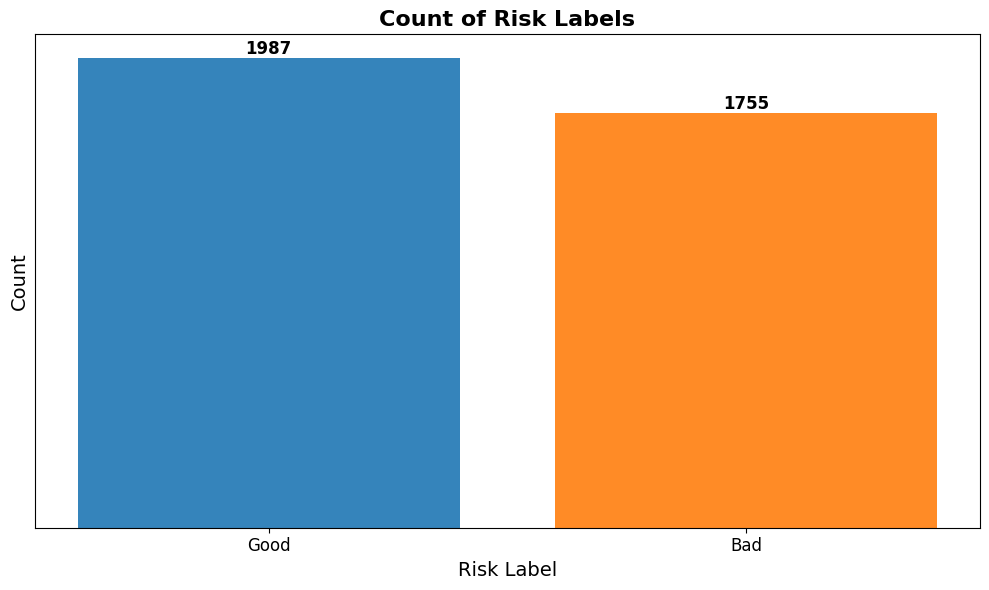

In [14]:
import matplotlib.pyplot as plt

# Count the occurrences of each risk label
risk_counts = rfm_df['Risk_Label'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e']  

bars = plt.bar(risk_counts.index, risk_counts.values, color=colors, alpha=0.9)

# Add count labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set title and labels with improved font sizes
plt.title('Count of Risk Labels', fontsize=16, fontweight='bold')
plt.xlabel('Risk Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels for better readability

# Remove Y-axis values
plt.yticks([])

# Show the grid and clean layout
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dashed grid for a cleaner look
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()

### **Perform Weight of Evidence (WoE) binning**

In [31]:
# Step 1: Create RFMS bins with unique edges
# This divides the RFM_Score into 5 quantile bins and assigns a bin number to each entry in the DataFrame.
rfm_df['RFM_bin'] = pd.qcut(rfm_df['RFM_Score'], 5, labels=False, duplicates='drop')
print("RFM bins created.")
print("=====================================================")
print("Here are the first few entries:")
rfm_df[['RFM_Score', 'RFM_bin']].head()

RFM bins created.
Here are the first few entries:


,RFM_Score,RFM_bin
0,4.0,4
2,1.0,0
3,4.0,4
5,1.0,0
6,4.0,4


In [28]:
# Step 2: Calculate good and bad counts
# This calculates the number of 'Good' and 'Bad' customers in each RFM bin.
good_count, bad_count = rfm.calculate_counts(rfm_df)
print("Good and Bad counts calculated for each RFM bin:")
print("===============================")
print(f"Good counts: {good_count}")
print("===============================")
print(f"Bad counts: {bad_count}")


Good and Bad counts calculated for each RFM bin:
Good counts: RFM_bin
0      0
1      0
2    530
3    818
4    639
Name: Risk_Label, dtype: int64
Bad counts: RFM_bin
0    787
1    856
2    112
3      0
4      0
Name: Risk_Label, dtype: int64


In [37]:
# Step 3: Calculate WoE values
# This computes the Weight of Evidence (WoE) for each RFM bin based on good and bad counts.
woe_values = rfm.calculate_woe(good_count, bad_count)
print("WoE values calculated for each RFM bin:")
print(woe_values)

# Create a mapping Series from the WoE values
# Mapping the WoE values to their corresponding RFM bins.
woe_mapping = pd.Series(woe_values, index=good_count.index)

WoE values calculated for each RFM bin:
RFM_bin
0   -22.223855
1   -22.307897
2     1.430221
3    22.138332
4    21.891374
Name: Risk_Label, dtype: float64


In [42]:
# Map WoE values back to the original DataFrame
# This adds a new column 'RFM_woe' to the DataFrame which contains the WoE for each customer based on their RFM bin.
rfm_df['RFM_woe'] = rfm_df['RFM_bin'].map(woe_mapping)
print("WoE values mapped back to the original DataFrame.")
print("==========================================================")
print("Here are the first few entries of the updated DataFrame:")
rfm_df[['RFM_bin', 'RFM_woe']].head()

WoE values mapped back to the original DataFrame.
Here are the first few entries of the updated DataFrame:


,RFM_bin,RFM_woe
0,4,21.891374
2,0,-22.223855
3,4,21.891374
5,0,-22.223855
6,4,21.891374


In [44]:
# Display the updated DataFrame
rfm_df[['RFM_Score', 'RFM_bin', 'Risk_Label', 'RFM_woe']].head(15)

,RFM_Score,RFM_bin,Risk_Label,RFM_woe
0,4.00,4,Good,21.891374
2,1.00,0,Bad,-22.223855
3,4.00,4,Good,21.891374
5,1.00,0,Bad,-22.223855
6,4.00,4,Good,21.891374
8,1.90,1,Bad,-22.307897
9,1.90,1,Bad,-22.307897
10,2.35,2,Good,1.430221
16,4.00,4,Good,21.891374
19,2.45,2,Good,1.430221


### **Visualize the result**

In [46]:
# Calculate the probability of bad loans
bad_probability = bad_count / (good_count + bad_count)

print("✅ Bad probability calculated successfully.")

✅ Bad probability calculated successfully.


In [48]:
# Prepare the DataFrame for plotting
plot_data = pd.DataFrame({
    'RFM_bin': good_count.index,
    'Good_Count': good_count.values,
    'Bad_Count': bad_count.values,
    'Bad_Probability': bad_probability.values,
    'RFM_woe': rfm_df.groupby('RFM_bin')['RFM_woe'].first().values
})

print("✅ DataFrame for plotting prepared successfully.")

✅ DataFrame for plotting prepared successfully.


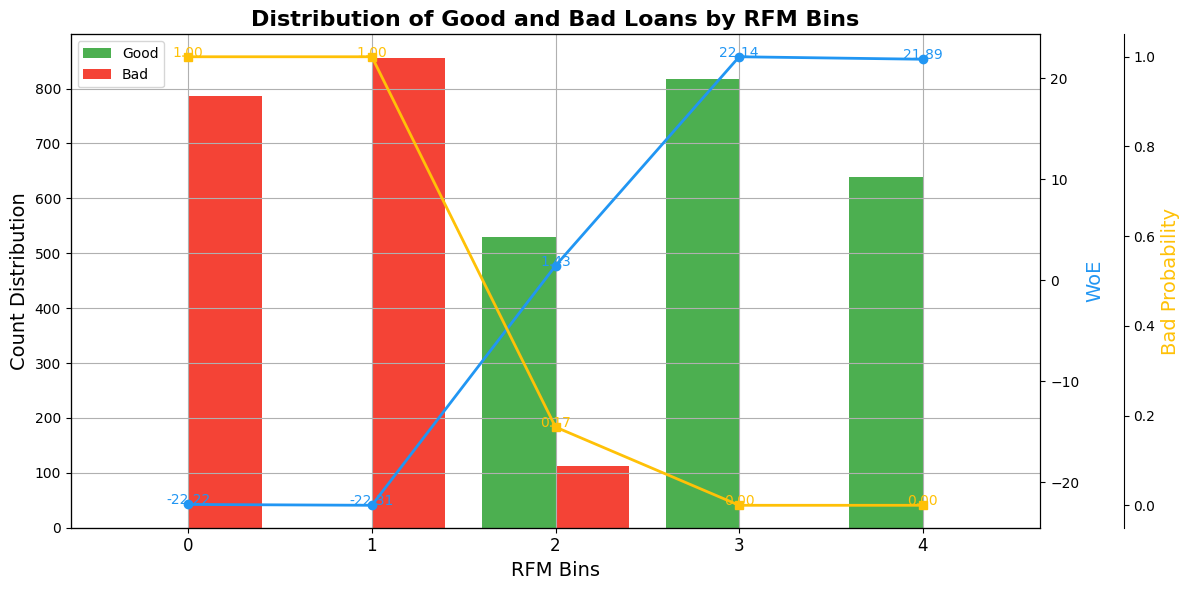

✅ Plot displayed successfully.


In [52]:
# Step 4: Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Good and Bad Counts
bar_width = 0.4
index = plot_data['RFM_bin']

# Create bar plots for Good and Bad counts with professional colors
bar1 = ax1.bar(index - bar_width/2, plot_data['Good_Count'], width=bar_width, label='Good', color='#4CAF50')  # Green
bar2 = ax1.bar(index + bar_width/2, plot_data['Bad_Count'], width=bar_width, label='Bad', color='#F44336')   # Red

ax1.set_xlabel('RFM Bins', fontsize=14)
ax1.set_ylabel('Count Distribution', fontsize=14)
ax1.set_title('Distribution of Good and Bad Loans by RFM Bins', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left')

# Adding WoE line with professional color
ax2 = ax1.twinx()
ax2.plot(index, plot_data['RFM_woe'], color='#2196F3', marker='o', label='WoE', linewidth=2)  # Blue
ax2.set_ylabel('WoE', color='#2196F3', fontsize=14)

# Annotate WoE values on the line
for i, woe in enumerate(plot_data['RFM_woe']):
    ax2.text(index[i], woe, f'{woe:.2f}', color='#2196F3', ha='center', fontsize=10)

# Adding Bad Probability with professional color
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outwards
ax3.plot(index, plot_data['Bad_Probability'], color='#FFC107', marker='s', label='Bad Probability', linewidth=2)  # Amber
ax3.set_ylabel('Bad Probability', color='#FFC107', fontsize=14)

# Annotate Bad Probability values on the line
for i, prob in enumerate(plot_data['Bad_Probability']):
    ax3.text(index[i], prob, f'{prob:.2f}', color='#FFC107', ha='center', fontsize=10)

# Show grid and finalize the plot
ax1.grid(True)
ax1.set_xticks(index)
ax1.set_xticklabels(plot_data['RFM_bin'], fontsize=12)
plt.tight_layout()
plt.show()

print("✅ Plot displayed successfully.")